In [37]:
!pip list

Package             Version
------------------- ---------
absl-py             1.0.0
astor               0.8.1
backcall            0.2.0
bleach              1.5.0
cached-property     1.5.2
certifi             2021.10.8
charset-normalizer  2.0.12
click               8.0.4
cycler              0.11.0
dataclasses         0.8
decorator           5.1.1
entrypoints         0.4
gast                0.5.3
grpcio              1.44.0
h5py                2.10.0
html5lib            0.9999999
idna                3.3
importlib-metadata  4.8.3
importlib-resources 5.4.0
ipykernel           5.5.6
ipython             7.16.3
ipython-genutils    0.2.0
jedi                0.17.2
joblib              1.1.0
jupyter-client      7.1.2
jupyter-core        4.9.2
Keras               2.2.1
Keras-Applications  1.0.4
Keras-Preprocessing 1.0.2
kiwisolver          1.3.1
Markdown            3.3.6
matplotlib          3.3.4
nest-asyncio        1.5.4
nltk                3.6.7
numpy               1.19.5
oauthlib            3.2

In [1]:
# !pip install pandas
!pip install tensorflow==1.8

In [10]:
!pip install keras==2.2.1

    100% |████████████████████████████████| 307kB 723kB/s ta 0:00:01
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 4.0MB 137kB/s ta 0:00:01
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 604kB 718kB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 1.1MB/s ta 0:00:01
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [ ]:
!pip uninstall pandas

Found existing installation: pandas 1.1.5
Uninstalling pandas-1.1.5:
  Would remove:
    /home/ashwin/Final year project/venv/lib/python3.6/site-packages/pandas-1.1.5.dist-info/*
    /home/ashwin/Final year project/venv/lib/python3.6/site-packages/pandas/*
Proceed (Y/n)? 

In [1]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk

Using TensorFlow backend.
/home/ashwin/Final year project/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ashwin/Final year project/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ashwin/Final year project/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ashwin/F

## Analysis of Dataset
Here we go through the total number of dataset present

In [2]:
data = pd.read_csv('IMDB Dataset.csv')

In [3]:
data.shape

(77293, 2)

In [4]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
77288,My GrandMa is making Dinenr with my Mum,positive
77289,Mid-morning snack time... A bowl of cheese noo...,positive
77290,@ShaDeLa same here say it like from the Termi...,positive
77291,@DestinyHope92 im great thaanks wbuu?,positive


## Installation of required packages for visualisation

In [8]:
!pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/09/03/b7b30fa81cb687d1178e085d0f01111ceaea3bf81f9330c937fb6f6c8ca0/matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/7d/2a/2fc11b54e2742db06297f7fa7f420a0e3069fdcf0e4b57dfec33f0b08622/Pillow-8.4.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/80/c1/23fd82ad3121656b585351aba6c19761926bb0db2ebed9e4ff09a43a3fcc/pyparsing-3.0.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a7/1b/cbd8ae738719b5f41592a12057ef5442e2ed5f5cb5451f8fc7e9f8875a1a/kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl
  Running setup.py bdist_wheel for pillow ... error
  Complete output from command "/home/ashwin/Final year project/venv/bin/python3" -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-a7hfggjx/pillow/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_whee

Failed to build pillow
  Running setup.py install for pillow ... error
    Complete output from command "/home/ashwin/Final year project/venv/bin/python3" -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-a7hfggjx/pillow/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /tmp/pip-6lomxp5t-record/install-record.txt --single-version-externally-managed --compile --install-headers "/home/ashwin/Final year project/venv/include/site/python3.6/pillow":
    /usr/lib/python3.6/distutils/dist.py:261: UserWarning: Unknown distribution option: 'long_description_content_type'
      warnings.warn(msg)
    running install
    running build
    running build_py
    creating build
    creating build/lib.linux-x86_64-3.6
    creating build/lib.linux-x86_64-3.6/PIL
    copying src/PIL/ImagePath.py -> build/lib.linux-x86_64-3.6/PIL
    copying src/PIL/ImageStat.py -> build/lib.linux-x86_64-3.

Command ""/home/ashwin/Final year project/venv/bin/python3" -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-a7hfggjx/pillow/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /tmp/pip-6lomxp5t-record/install-record.txt --single-version-externally-managed --compile --install-headers "/home/ashwin/Final year project/venv/include/site/python3.6/pillow"" failed with error code 1 in /tmp/pip-build-a7hfggjx/pillow/


In [5]:
c=0
for i in range(len(data)):
    if(data.sentiment[i]=="positive"):
        c=c+1
n=len(data)-c

In [6]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
77288,My GrandMa is making Dinenr with my Mum,positive
77289,Mid-morning snack time... A bowl of cheese noo...,positive
77290,@ShaDeLa same here say it like from the Termi...,positive
77291,@DestinyHope92 im great thaanks wbuu?,positive


In [8]:
!python -m pip install --upgrade pip
!python -m pip install --upgrade pillow

In [14]:
!pip install matplotlib

  Using cached matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl (11.5 MB)


In [7]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

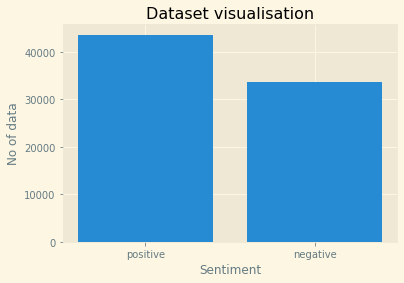

In [8]:
x = ['positive','negative']
y = [c,n]
plt.style.use('Solarize_Light2')
plt.bar(x, y)
plt.title('Dataset visualisation')
plt.xlabel('Sentiment')
plt.ylabel('No of data')

plt.show()

# Data Preprocessing

First, we need to remove HTML tags, URLs, and non-alphanumeric characters from the reviews. We do that with the help of the remove_tags function, and Regex functions are used for easy string manipulation.

In [9]:
def remove_tags(string):
    removelist = ""
    result = re.sub('','',string)          #remove HTML tags
    result = re.sub('https://.*','',result)   #remove URLs
#     result = re.sub(r'[^w'+removelist+']', ' ',result)    #remove non-alphanumeric characters 
    result = result.lower()
    re_html=re.compile(r'<[^>]+>')
    re_html.sub('',result)
    result = re.sub(r'\d+', '', result)
    return result
data['review']=data['review'].apply(lambda cw : remove_tags(cw))

In [10]:
data

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
77288,my grandma is making dinenr with my mum,positive
77289,mid-morning snack time... a bowl of cheese noo...,positive
77290,@shadela same here say it like from the termi...,positive
77291,@destinyhope im great thaanks wbuu?,positive


### Removing html tags 

In [10]:
for i in range(len(data)):    
    re_html=re.compile(r'<[^>]+>')
    data['review'][i]=re_html.sub('',data.review[i])
    

In [11]:
data

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
77288,my grandma is making dinenr with my mum,positive
77289,mid-morning snack time... a bowl of cheese noo...,positive
77290,@shadela same here say it like from the termi...,positive
77291,@destinyhope im great thaanks wbuu?,positive


## Remove non-alphanumeric characters 

In [12]:
for i in range(len(data)):
    words = [word for word in data.review[i].split() if word.isalpha()]
    data['review'][i] = ' '.join(words)

In [13]:
data

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little the filming technique is ve...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically a family where a little boy thinks a...,negative
4,petter in the time of is a visually stunning f...,positive
...,...,...
77288,my grandma is making dinenr with my mum,positive
77289,snack a bowl of cheese,positive
77290,same here say it like from the terminiator com...,positive
77291,im great thaanks,positive


### We also need to remove stopwords from the corpus. Stopwords are commonly used words like ‘and’, ‘the’, ‘at’ that do not add any special meaning or significance to a sentence

In [14]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /home/ashwin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

## Lemmatization

In [15]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
data['review'] = data.review.apply(lemmatize_text)
data

,review,sentiment
0,one reviewer mentioned watching oz episode exa...,positive
1,wonderful little filming technique fashion giv...,positive
2,thought wonderful way spend time hot summer si...,positive
3,basically family little boy think zombie close...,negative
4,petter time visually stunning film mattei offe...,positive
...,...,...
77288,grandma making dinenr mum,positive
77289,snack bowl cheese,positive
77290,say like terminiator come like,positive
77291,im great thaanks,positive


In [16]:
s = 0.0
for i in data['review']:
    word_list = i.split()
    s = s + len(word_list)
print("Average length of each review : ",s/data.shape[0])
pos = 0
for i in range(data.shape[0]):
    if data.iloc[i]['sentiment'] == 'positive':
        pos = pos + 1
neg = data.shape[0]-pos
print("Percentage of reviews with positive sentiment is "+str(pos/data.shape[0]*100)+"%")
print("Percentage of reviews with negative sentiment is "+str(neg/data.shape[0]*100)+"%")
# >>Average length of each review :  119.57112
# >>Percentage of reviews with positive sentiment is 50.0%
# >>Percentage of reviews with negative sentiment is 50.0%

Average length of each review :  56.95628323392804
Percentage of reviews with positive sentiment is 56.459187766033146%
Percentage of reviews with negative sentiment is 43.540812233966854%


## Saving the preprocessed data to a new csv

In [17]:
data

,review,sentiment
0,one reviewer mentioned watching oz episode exa...,positive
1,wonderful little filming technique fashion giv...,positive
2,thought wonderful way spend time hot summer si...,positive
3,basically family little boy think zombie close...,negative
4,petter time visually stunning film mattei offe...,positive
...,...,...
77288,grandma making dinenr mum,positive
77289,snack bowl cheese,positive
77290,say like terminiator come like,positive
77291,im great thaanks,positive


In [18]:
data.to_csv('file2.csv', index=False)

In [19]:
data1=pd.read_csv('file2.csv')
data1

,review,sentiment
0,one reviewer mentioned watching oz episode exa...,positive
1,wonderful little filming technique fashion giv...,positive
2,thought wonderful way spend time hot summer si...,positive
3,basically family little boy think zombie close...,negative
4,petter time visually stunning film mattei offe...,positive
...,...,...
77288,grandma making dinenr mum,positive
77289,snack bowl cheese,positive
77290,say like terminiator come like,positive
77291,im great thaanks,positive


## Encoding Labels and Making Train-Test Splits

In [20]:
reviews = data['review'].values
labels = data['sentiment'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [23]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)

In [24]:
# Hyperparameters of the model
vocab_size = 3000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = 200 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [25]:
word_index['movie']

2

In [26]:
train_padded[2].size

200

In [30]:
train_sequences

[[1502, 37, 36, 526],
 [1527, 342, 1225, 1225, 1711, 64, 2455, 121],
 [31, 57, 815, 8, 1],
 [20,
  713,
  72,
  735,
  59,
  368,
  122,
  43,
  62,
  1,
  1,
  1305,
  594,
  53,
  424,
  469,
  121,
  17,
  1,
  1,
  54,
  241,
  293,
  87,
  44,
  6,
  232,
  300,
  721,
  1,
  1,
  31,
  1516,
  31,
  163,
  13,
  237,
  31,
  6,
  2,
  515,
  237,
  897,
  693,
  2846,
  1048,
  2112,
  1,
  118,
  91,
  978,
  347,
  1,
  2,
  13,
  12,
  2323,
  1,
  1,
  139,
  122,
  111,
  759,
  110,
  15,
  532,
  794,
  539,
  12,
  354,
  1960,
  2,
  240],
 [12, 1, 578, 72, 4, 850, 321, 1360],
 [317,
  77,
  1,
  2,
  30,
  24,
  51,
  2471,
  21,
  1726,
  7,
  71,
  1,
  72,
  438,
  281,
  241,
  1,
  1438,
  28,
  580,
  2,
  31,
  297,
  6,
  206,
  79,
  1,
  10,
  5,
  1438,
  12,
  7,
  63,
  23,
  408,
  9,
  2],
 [94,
  1115,
  1730,
  394,
  115,
  1,
  206,
  1115,
  1,
  1,
  29,
  2443,
  181,
  168,
  1262,
  1,
  1784,
  264,
  1461,
  94,
  1,
  68,
  1,
  5,
  1,
  2100

## Building the Model

In [31]:
# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          300000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               84480     
_________________________________________________________________
dense_1 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 387,601
Trainable params: 387,601
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [32]:
num_epochs = 6
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=1, 
                    validation_split=0.1)

Train on 52172 samples, validate on 5797 samples
Epoch 1/6
52172/52172 [==============================] - 412s 8ms/step - loss: 0.4907 - acc: 0.7655 - val_loss: 0.4234 - val_acc: 0.8070
Epoch 2/6
52172/52172 [==============================] - 399s 8ms/step - loss: 0.4031 - acc: 0.8179 - val_loss: 0.4165 - val_acc: 0.8168
Epoch 3/6
52172/52172 [==============================] - 404s 8ms/step - loss: 0.3745 - acc: 0.8327 - val_loss: 0.4341 - val_acc: 0.8040
Epoch 4/6
52172/52172 [==============================] - 403s 8ms/step - loss: 0.3465 - acc: 0.8497 - val_loss: 0.4310 - val_acc: 0.8127
Epoch 5/6
52172/52172 [==============================] - 399s 8ms/step - loss: 0.3225 - acc: 0.8603 - val_loss: 0.4571 - val_acc: 0.8090
Epoch 6/6
52172/52172 [==============================] - 396s 8ms/step - loss: 0.2932 - acc: 0.8722 - val_loss: 0.4616 - val_acc: 0.8047


In [33]:
test_padded[1]

array([   4,  950,   27,  579,  483,  766,   32,   66,  127,   32,  158,
         64,   27,    1,   20,   35,   60,  292,    1,    1, 2165,    1,
          1, 1111, 1963,  303,  506,   46,    1, 2904,    1,    1,  688,
        275,    1, 1260, 2059, 2261,  688,    1,   48,  191,  754,    1,
       1426, 2321,  688,  794,  391,  689,    1,    1,    1,  418,  303,
        166,  321,   27,  741, 1409,  106,   51,  434,  476,  835,  146,
        183,  170, 1277,   18,   94,   35,  192, 2792,  193,  632,  294,
       2792,    1,  993,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [34]:
prediction = model.predict(test_padded)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred_labels))

Accuracy of prediction on test set :  0.8021113641068102


# Saving Model

In [43]:
filename="Model.h5" 
model.save(filename)

# !pip uninstall h5py !pip install h5py==2.10 -i https://pypi.tuna.tsinghua.edu.cn/simple/
# from tensorflow import keras.models.load_model

import tensorflow as tf
new_model = tf.keras.models.load_model(filename)
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          300000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               84480     
_________________________________________________________________
dense_1 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 387,601
Trainable params: 387,601
Non-trainable params: 0
_________________________________________________________________


filename="Model.h5"
model.save(filename)

!pip uninstall h5py
!pip install h5py==2.10 -i https://pypi.tuna.tsinghua.edu.cn/simple/

from tensorflow import keras
model_load = keras.models.load_model(filename)

## Manual Test

In [44]:
# reviews on which we need to predict
sentence = ["The initiative was very touching and heart whelming", 
            "the match was good",
            "I love basketball",
            "Fortunately, the brand responded quickly and offered to make things right by giving the customer a free treat to make up for it. ", 
            "the movie plot is terrible but it had good acting",
            "What can you learn from this? Don’t take yourself too seriously! If a customer brings a serious issue to your attention, trying to play it off as a joke would be a mistake. But small mistakes can be handled with humour and irreverence."
           ,"@AmericanAir just landed - 3hours Late Flight - and now we need to wait TWENTY MORE MINUTES for a gate! I have patience but none for incompetence."]
# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)
# pad the sequence
padded = pad_sequences(sequences, padding='post', maxlen=max_length)
# Get labels based on probability 1 if p>= 0.5 else 0
prediction = model.predict(padded)
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
for i in range(len(sentence)):
    print(sentence[i])
    if pred_labels[i] == 1:
        s = 'Positive'
    else:
        s = 'Negative'
    print("Predicted sentiment : ",s)

The initiative was very touching and heart whelming
Predicted sentiment :  Positive
the match was good
Predicted sentiment :  Positive
I love basketball
Predicted sentiment :  Positive
Fortunately, the brand responded quickly and offered to make things right by giving the customer a free treat to make up for it. 
Predicted sentiment :  Positive
the movie plot is terrible but it had good acting
Predicted sentiment :  Negative
What can you learn from this? Don’t take yourself too seriously! If a customer brings a serious issue to your attention, trying to play it off as a joke would be a mistake. But small mistakes can be handled with humour and irreverence.
Predicted sentiment :  Positive
@AmericanAir just landed - 3hours Late Flight - and now we need to wait TWENTY MORE MINUTES for a gate! I have patience but none for incompetence.
Predicted sentiment :  Negative


In [45]:
# reviews on which we need to predict
sentence = ["The initiative was very touching and heart whelming", 
            "the match was good",
            "I love basketball",
            "Fortunately, the brand responded quickly and offered to make things right by giving the customer a free treat to make up for it. ", 
            "the movie plot is terrible but it had good acting",
            "What can you learn from this? Don’t take yourself too seriously! If a customer brings a serious issue to your attention, trying to play it off as a joke would be a mistake. But small mistakes can be handled with humour and irreverence."
           ,"@AmericanAir just landed - 3hours Late Flight - and now we need to wait TWENTY MORE MINUTES for a gate! I have patience but none for incompetence."]
# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)
# pad the sequence
padded = pad_sequences(sequences, padding='post', maxlen=max_length)
# Get labels based on probability 1 if p>= 0.5 else 0
prediction = new_model.predict(padded)
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
for i in range(len(sentence)):
    print(sentence[i])
    if pred_labels[i] == 1:
        s = 'Positive'
    else:
        s = 'Negative'
    print("Predicted sentiment : ",s)

The initiative was very touching and heart whelming
Predicted sentiment :  Positive
the match was good
Predicted sentiment :  Positive
I love basketball
Predicted sentiment :  Positive
Fortunately, the brand responded quickly and offered to make things right by giving the customer a free treat to make up for it. 
Predicted sentiment :  Positive
the movie plot is terrible but it had good acting
Predicted sentiment :  Negative
What can you learn from this? Don’t take yourself too seriously! If a customer brings a serious issue to your attention, trying to play it off as a joke would be a mistake. But small mistakes can be handled with humour and irreverence.
Predicted sentiment :  Positive
@AmericanAir just landed - 3hours Late Flight - and now we need to wait TWENTY MORE MINUTES for a gate! I have patience but none for incompetence.
Predicted sentiment :  Negative


# Twitter API Setting up

In [46]:
!pip install tweepy 

In [47]:
import tweepy # tweepy module to interact with Twitter
import pandas as pd # Pandas library to create dataframes
from tweepy import OAuthHandler # Used for authentication
from tweepy import Cursor # Used to perform pagination

In [48]:
"""
Twitter Authentification Credentials
Please update with your own credentials
"""
cons_key = 'XLXykoJVpX0I3lj2kmQ9rtYYw' #API Key
cons_secret = 'e1Bwmhl5lN0hNXyXRC5AP4qGTvO2e5eGpQjXreOhXpMqwL3U0L'#API Key Secret
acc_token = '1397865066645524483-skSTqi3LleIGfM8SM3JwbfjMFWLbX8'
acc_secret = 'x3YNYpQtC6GoEVeCcYOZRnC7VQ6KMOq3Qrg0pGvqoOcJo'# (1). Athentication Function
def get_twitter_auth():
    """
    @return:
        - the authentification to Twitter
    """
    try:
        consumer_key = cons_key
        consumer_secret = cons_secret
        access_token = acc_token
        access_secret = acc_secret
        
    except KeyError:
        sys.stderr.write("Twitter Environment Variable not Set\n")
        sys.exit(1)
        
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    
    return auth# (2). Client function to access the authentication API
def get_twitter_client():
    """
    @return:
        - the client to access the authentification API
    """
    auth = get_twitter_auth()
    client = tweepy.API(auth, wait_on_rate_limit=True)
    return client
# (3). Function creating final dataframe
def get_tweets_from_user(twitter_user_name, page_limit=16, count_tweet=200):
    """
    @params:
        - twitter_user_name: the twitter username of a user (company, etc.)
        - page_limit: the total number of pages (max=16)
        - count_tweet: maximum number to be retrieved from a page
        
    @return
        - all the tweets from the user twitter_user_name
    """
    client = get_twitter_client()
    
    all_tweets = []
    
    for page in Cursor(client.user_timeline, 
                        screen_name=twitter_user_name, 
                        count=count_tweet).pages(page_limit):
        for tweet in page:
            parsed_tweet = {}
            parsed_tweet['date'] = tweet.created_at
            parsed_tweet['author'] = tweet.user.name
            parsed_tweet['twitter_name'] = tweet.user.screen_name
            parsed_tweet['text'] = tweet.text
            parsed_tweet['number_of_likes'] = tweet.favorite_count
            parsed_tweet['number_of_retweets'] = tweet.retweet_count
                
            all_tweets.append(parsed_tweet)
    
    # Create dataframe 
    df = pd.DataFrame(all_tweets)
    
    # Revome duplicates if there are any
    df = df.drop_duplicates( "text" , keep='first')
    
    return df

In [49]:
googleAI = get_tweets_from_user("demonetisation")
print("Data Shape: {}".format(googleAI.shape))

Data Shape: (60, 6)


In [51]:
googleAI.text[1]

'@DasShaktikanta banks should  specify branches exclusive for deposits of old currency to fasten the process of demonetization'

In [68]:
sentence = [googleAI.text[3]]
# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)
# pad the sequence
padded = pad_sequences(sequences, padding='post', maxlen=max_length)
# Get labels based on probability 1 if p>= 0.5 else 0
prediction = new_model.predict(padded)
print("prediction",prediction)
pred_labels = []
for i in prediction[0]:
    print(i)
    """
    0=negative
    1=Neutral
    2=Positive
    """
    if i >= 0.6:
        pred_labels.append(2)#positive
        print("p",i)
    elif 0.3<=i<=0.6:
        pred_labels.append(1)#neutral
        print("neu",i)
    else:
        pred_labels.append(0)#negative
        print("neg",i)
for i in range(len(sentence)):
    print(sentence[i])
    if pred_labels[i] == 2:
        s = 'Positive'
    elif pred_labels[i] == 0:
        s = 'Negative'
    else:
        s = 'Neutral'
    print("Predicted sentiment : ",s)
   

prediction [[0.4376968]]
0.4376968
neu 0.4376968
@DasShaktikanta does that means that deposit process in rural areas is over to large extent
Predicted sentiment :  Neutral
